   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


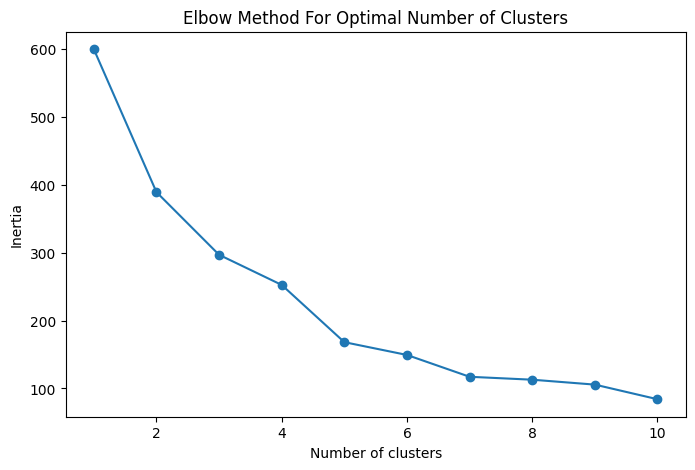

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1       0   19                  15                      39   
1             2       0   21                  15                      81   
2             3       1   20                  16                       6   
3             4       1   23                  16                      77   
4             5       1   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196       1   35                 120                      79   
196         197       1   45                 126                      28   
197         198       0   32                 126                      74   
198         199       0   32                 137                      18   
199         200       0   30                 137                      83   

     Cluster  
0          2  
1          2  
2          0  
3          2  
4          0

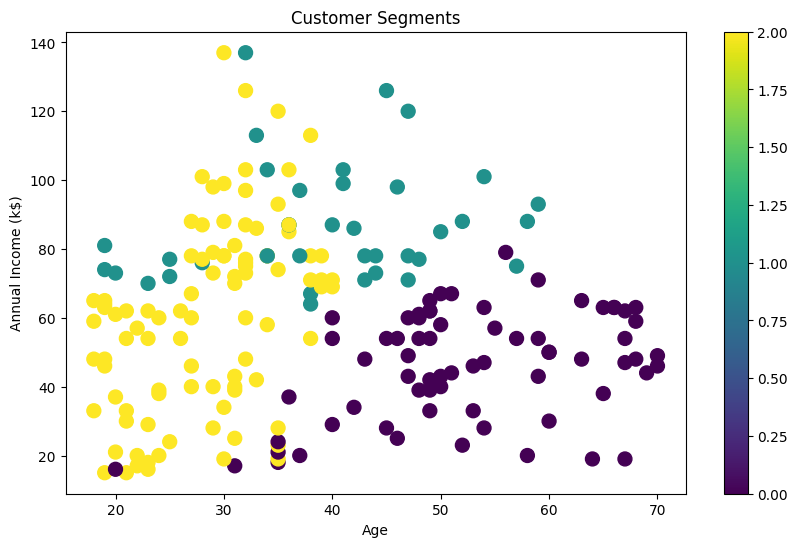

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset
print(df.head())
# Preprocess the data
# Encode 'Gender' column (Male: 0, Female: 1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Select features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

# From the elbow plot, determine the optimal number of clusters (e.g., 3)
optimal_clusters = 3

# Fit the K-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the clustered data
print(df)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Customer Segments')
plt.colorbar()
plt.show()
